**Bring Dataset**

In [2]:
import os
import tarfile
import urllib.request
import pandas as pd

DOWNLOAD_ROOT = "https://github.com/ageron/data/raw/main/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    with tarfile.open(tgz_path) as housing_tgz:
        housing_tgz.extractall(path=housing_path)

fetch_housing_data()
# df = pd.read_csv(os.path.join(HOUSING_PATH, "housing.csv"))

In [71]:
df = pd.read_csv(os.path.join(r"D:\airepos\forked_ai_roadmap\ai-roadmap\content\ml\preprocessing\datasets\housing\housing", "housing.csv"))

## **Part 1: Exploratory Data Analysis (EDA)**

1. Display:

   * The first 10 rows.
   * Dataset info using `.info()`.
   * Summary statistics using `.describe()`.
   * Value counts for categorical columns (e.g., `ocean_proximity`).

2. Identify:

   * Columns with missing values.
   * Numerical vs categorical features.
   * Columns with unusual distributions or outliers.

---

### 1.Display ###

In [72]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [74]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [75]:
df.value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
-114.31    34.19     15.0                5612.0       1283.0          1015.0      472.0       1.4936         66900.0             INLAND             1
-124.35    40.54     52.0                1820.0       300.0           806.0       270.0       3.0147         94600.0             NEAR OCEAN         1
-124.30    41.80     19.0                2672.0       552.0           1298.0      478.0       1.9797         85800.0             NEAR OCEAN         1
           41.84     17.0                2677.0       531.0           1244.0      456.0       3.0313         103600.0            NEAR OCEAN         1
-124.27    40.69     36.0                2349.0       528.0           1194.0      465.0       2.5179         79000.0             NEAR OCEAN         1
                                                                                                         

In [76]:
df.select_dtypes(include=["object", "category"]).value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
Name: count, dtype: int64

### 2. Identify ###

In [77]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [78]:
df_numer = df.select_dtypes(include=["int64", "float64"]).columns
df_categ = df.select_dtypes(exclude=["int64", "float64"]).columns
df_numer, df_categ

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value'],
       dtype='object'),
 Index(['ocean_proximity'], dtype='object'))

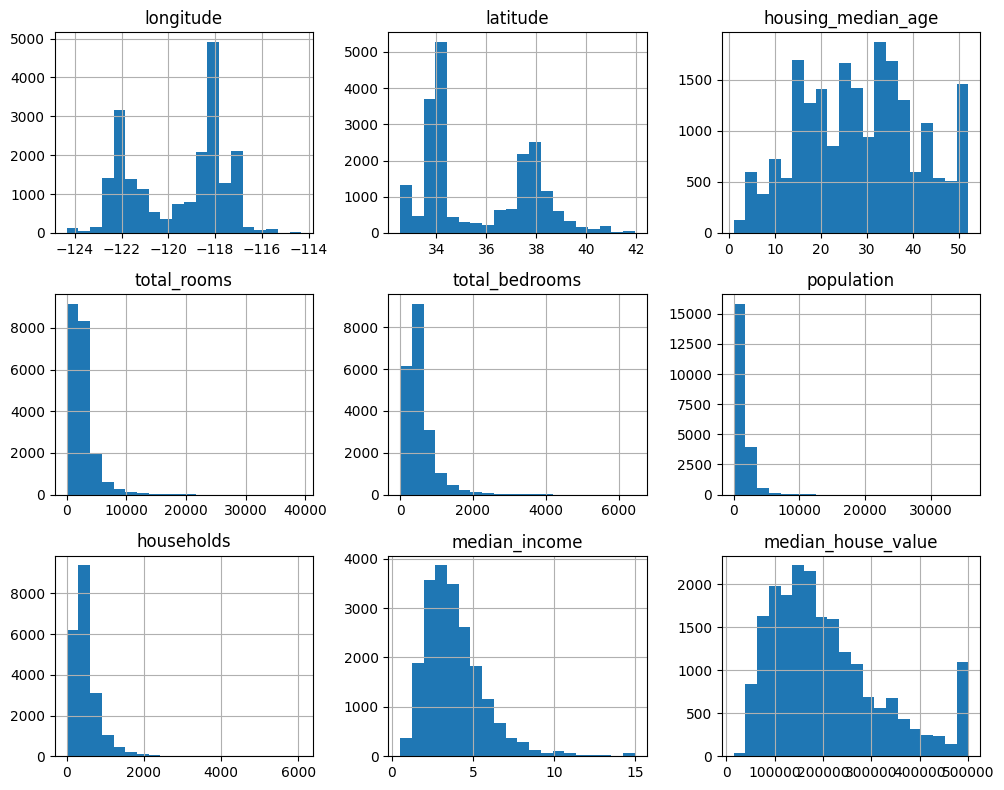

In [79]:
import matplotlib.pyplot as plt
import seaborn
df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()  # Auto-adjust spacing to prevent overlap
plt.show()

## **Part 2: Handling Missing Values**

3. For missing data:

   * Drop any row or column if missing values are insignificant.
   * Use **median** imputation for `total_bedrooms`.

4. Create a `missing_report(df)` function that:

   * Returns a DataFrame: column name, count and percentage of missing values.

---


### 3. For missing data ###

In [83]:
df2 = df.copy()

In [84]:
# df.dropna(inplace=True) # if there are some NaNs, but there are no NULLs except total_bedrooms which requires imputation
df2.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [85]:
from sklearn.impute import SimpleImputer

med_impute = SimpleImputer(strategy='median')
df2['total_bedrooms'] = med_impute.fit_transform(df2[['total_bedrooms']])

In [86]:
df2.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### 4. Create a `missing_report(df)` function that: ###

In [87]:
# For following task:

df.isna().mean() * 100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [88]:
import numpy as np
def missing_report(df):
    # data1 = df.to_numpy()
    data1 = df.isna().sum()
    data2 = df.isna().mean() * 100
    result = pd.DataFrame({
        'count of NaN': data1,
        'percentage of NaN': data2
    })
    return result

missing_report(df)

,count of NaN,percentage of NaN
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
total_bedrooms,207,1.002907
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
median_house_value,0,0.000000
ocean_proximity,0,0.000000



## **Part 3: Encoding Categorical Variables**

5. Encode the `ocean_proximity` column:

   * Use **One-Hot Encoding** via `pd.get_dummies()` or `OneHotEncoder`.

---


### 5. Encode the ocean_proximity column ###

In [114]:
from sklearn.preprocessing import OneHotEncoder
df3 = df.copy()
one_hot_en = OneHotEncoder(sparse_output=False)
one_hot_en.fit(df3[['ocean_proximity']])
resulting_df = pd.DataFrame(data=one_hot_en.transform(df3[['ocean_proximity']]), columns=one_hot_en.get_feature_names_out())
df3 = df3.drop('ocean_proximity', axis=1)
df3 = pd.concat([df3, resulting_df], axis=1)
df3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


## **Part 4: Feature Scaling**

6. For numerical features:

   * Apply both **StandardScaler** and **MinMaxScaler** to features like:

     * `median_income`, `housing_median_age`, `population`, `median_house_value`
   * Plot feature histograms before and after scaling.

---


### 6. For numerical features: ###

Mean: 3.8706710029069766, Standard Deviation: 1.8998217179452688, minimum is 0.4999, maximum is 15.0001
Mean: 28.639486434108527, Standard Deviation: 12.58555761211165, minimum is 1.0, maximum is 52.0
Mean: 1425.4767441860465, Standard Deviation: 1132.462121765341, minimum is 3.0, maximum is 35682.0
Mean: 206855.81690891474, Standard Deviation: 115395.61587441387, minimum is 14999.0, maximum is 500001.0


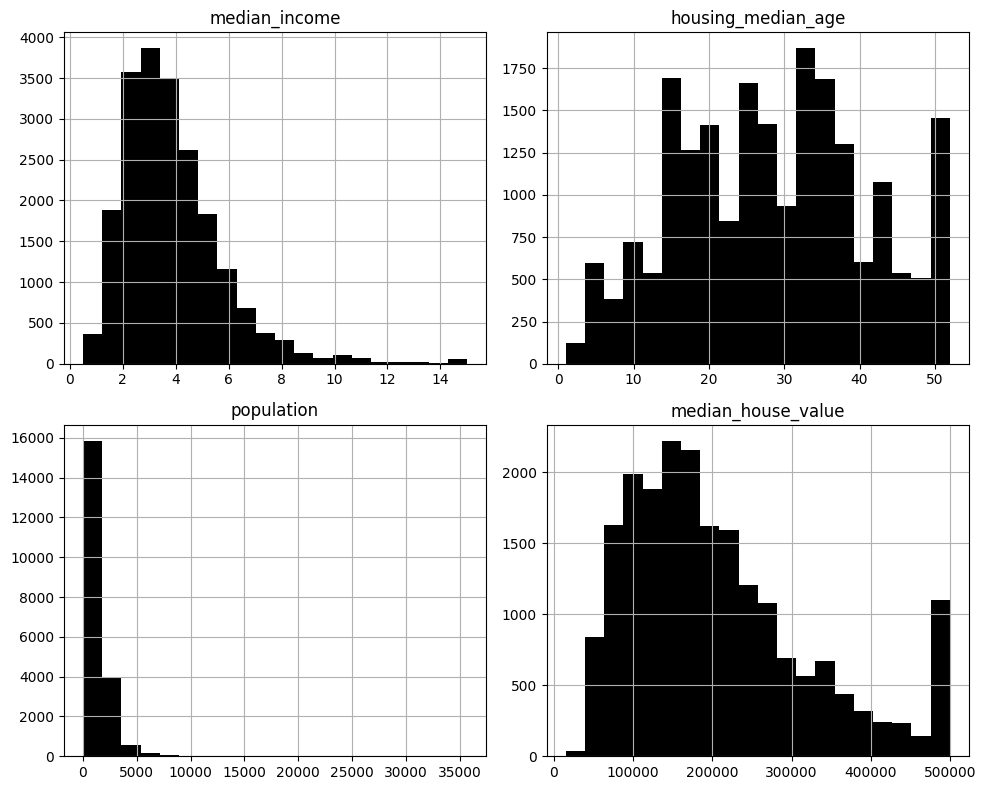

In [158]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df4 = df.copy()
columnss = ["median_income", 'housing_median_age', 'population', 'median_house_value']

for col in columnss:
    print(f"Mean: {df4[col].mean()}, Standard Deviation: {df4[col].std()}, minimum is {df4[col].min()}, maximum is {df4[col].max()}")

df4[columnss].hist(figsize=(10, 8), bins=20, color='black')
plt.tight_layout()
plt.show()

Mean: 5.645785303520176e-17, Standard Deviation: 1.0000242256864988, minimum is -1.7742994673175232, maximum is 5.858285811780286
Mean: 3.7868072157757277e-17, Standard Deviation: 1.0000242256864986, minimum is -2.1961804849268263, maximum is 1.8561815225324745
Mean: -1.1016166445893026e-17, Standard Deviation: 1.0000242256864986, minimum is -1.2561225469018058, maximum is 30.250330218731502
Mean: -9.77684772073006e-17, Standard Deviation: 1.0000242256864988, minimum is -1.6626408492053848, maximum is 2.5404109377381365


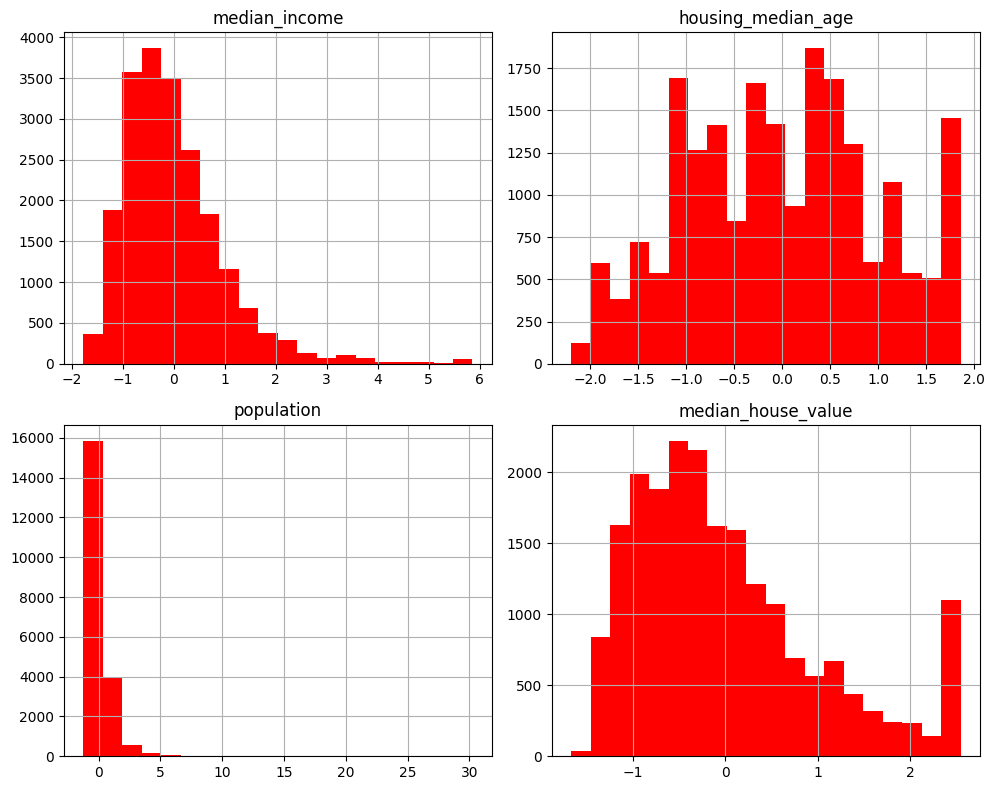

In [159]:
stand_scale = StandardScaler()
min_max_scale = MinMaxScaler()

df4[columnss] = stand_scale.fit_transform(df4[columnss])
# df4[columnss] = min_max_scale.fit_transform(df4[columnss])
# print(type(min_max_scale.fit_transform(df4[columnss])))

for col in columnss:
    print(f"Mean: {df4[col].mean()}, Standard Deviation: {df4[col].std()}, minimum is {df4[col].min()}, maximum is {df4[col].max()}")

df4[columnss].hist(figsize=(10, 8), bins=20, color='red')
plt.tight_layout()
plt.show()

## **Part 5: Optional Feature Engineering**

7. Create meaningful new features:

   * `rooms_per_household = total_rooms / households`
   * `bedrooms_per_room = total_bedrooms / total_rooms`
   * `population_per_household = population / households`

### 7. Create meaningful new features: ###

In [164]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209
